In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [52]:
data = pd.read_csv('../../Data/SAP_numeric.csv')
data.head()

# Y = data['Class'].values
# data2 = data.drop(['Class'],axis=1)
# x = data2.values

x, Y = data.drop('Class', axis=1), np.asarray(data['Class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.20)

In [36]:
classifiers = [('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]

allscores = []


BernoulliNB Mean accuracy 0.71 and mean f1_score 0.71 after 20 Iteration

GaussianNB Mean accuracy 0.72 and mean f1_score 0.73 after 20 Iteration

DecisionTreeClassifier Mean accuracy 0.70 and mean f1_score 0.71 after 20 Iteration

AdaBoostClassifier Mean accuracy 0.69 and mean f1_score 0.70 after 20 Iteration



[None, None, None, None, None, None, None, None]

<Figure size 1080x720 with 0 Axes>

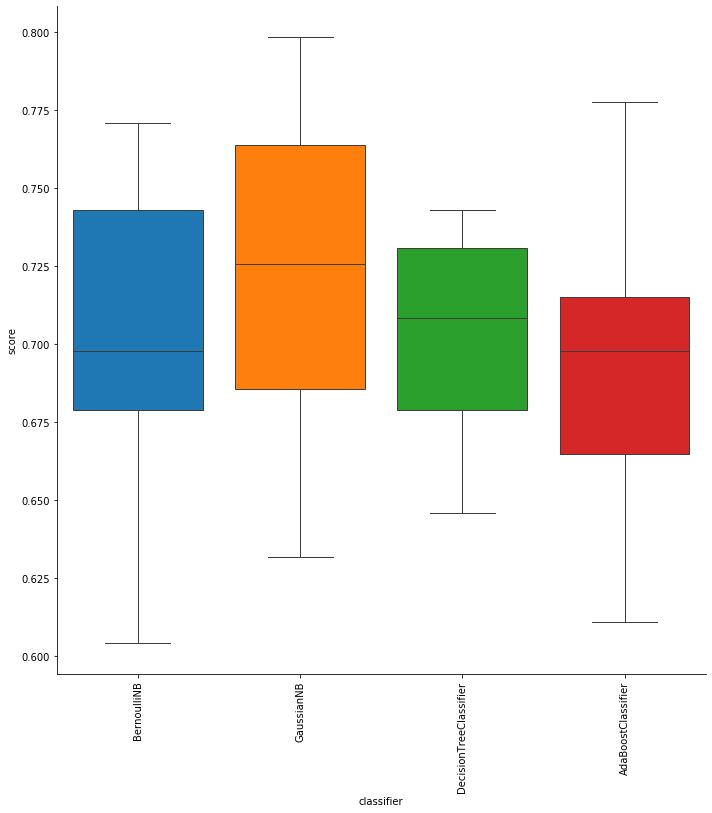

In [134]:
data = pd.read_csv('../../Data/SAP_numeric.csv')
data.head()

classifiers = [('BernoulliNB', BernoulliNB()), 
               ('GaussianNB', GaussianNB()),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('AdaBoostClassifier', AdaBoostClassifier())
              ]

allscores = []

for name, classifier in classifiers:
    accuracy=  0.0
    f1_total = np.array([])
    scores = np.array([])
    for i in range(20):
        x, Y = data.drop('Class', axis=1), np.asarray(data['Class'])
        Xtrain, Xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.30)

        scaler = StandardScaler()
        Xtrain_scaled = scaler.fit_transform(Xtrain)
        Xtest_scaled = scaler.transform(Xtest)
        #Calculate the class prior probabilities for each continent
        classifier.fit(Xtrain_scaled, ytrain)
        #Make a prediction for the test data
        ypred = classifier.predict(Xtest_scaled)
        #Calculate the accuracy of the data
        scores = np.append(scores, accuracy_score(ytest, ypred))
        accuracy = accuracy + accuracy_score(ytest, ypred)
        f1_total = np.append(f1_total, np.average(f1_score(ytest, ypred, average=None)))

    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)
    accuracy_avg = accuracy / 20
    f1_avg = np.average(f1_total)
    print(name+" Mean accuracy %.2f and mean f1_score %.2f after 20 Iteration\n" % (accuracy_avg, f1_avg))
    
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.catplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               height = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [123]:
svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(Xtrain, ytrain)

ypred = svm.predict(Xtest)
print('Misclassified samples: %d' % (ytest != ypred).sum())
print('Accuracy: %.2f' % accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Misclassified samples: 39
Accuracy: 0.73
              precision    recall  f1-score   support

           1       0.71      0.74      0.73        47
           2       0.91      0.73      0.81        41
           3       0.65      0.71      0.68        56

    accuracy                           0.73       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.74      0.73      0.73       144

